In [5]:
# Import and Explore Data
import os
import matplotlib.pyplot as plt

DATA_DIR = 'dataset/images/images'
classes = os.listdir(DATA_DIR)
print("Classes:", classes)

Classes: ['disposable_plastic_cutlery', 'food_waste', 'office_paper', 'glass_food_jars', 'aluminum_soda_cans', 'magazines', 'clothing', 'plastic_shopping_bags', 'plastic_soda_bottles', 'styrofoam_food_containers', 'aerosol_cans', 'aluminum_food_cans', 'newspaper', 'eggshells', 'glass_cosmetic_containers', 'paper_cups', 'plastic_water_bottles', 'coffee_grounds', 'steel_food_cans', 'plastic_cup_lids', 'cardboard_packaging', 'cardboard_boxes', 'plastic_straws', 'styrofoam_cups', 'glass_beverage_bottles', 'shoes', 'plastic_trash_bags', 'tea_bags', 'plastic_food_containers', 'plastic_detergent_bottles']


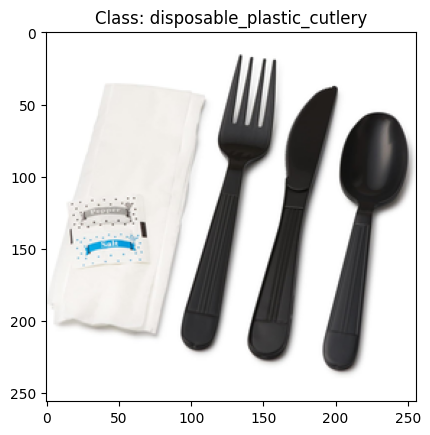

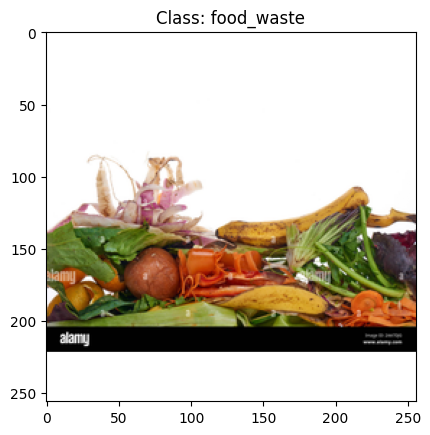

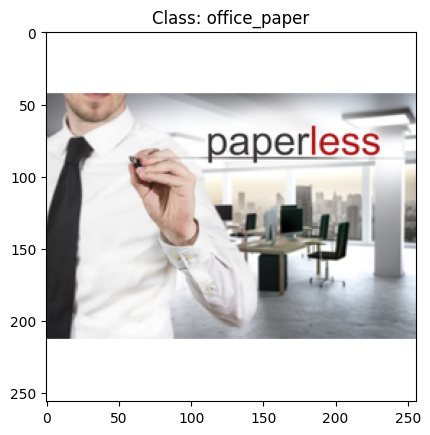

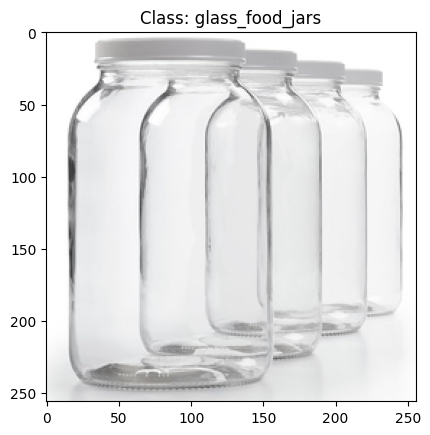

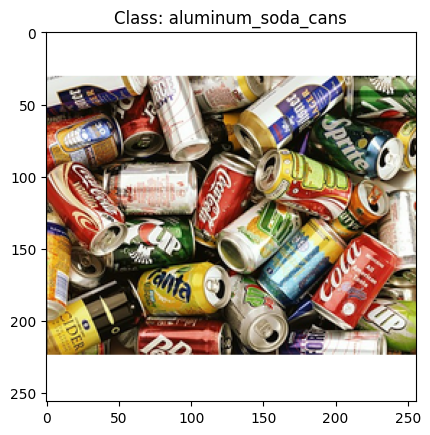

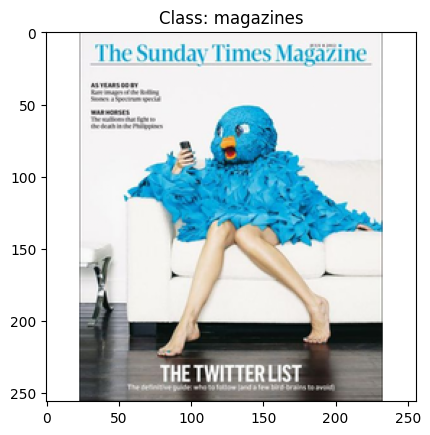

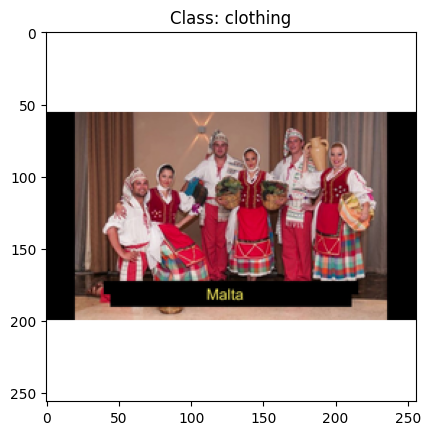

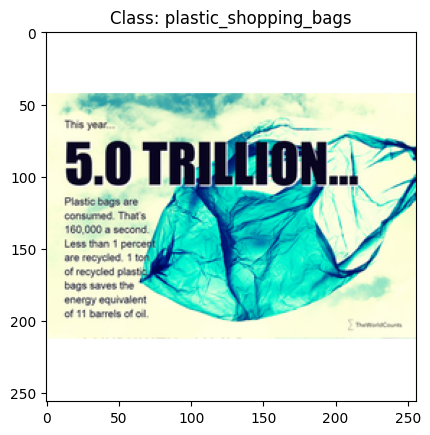

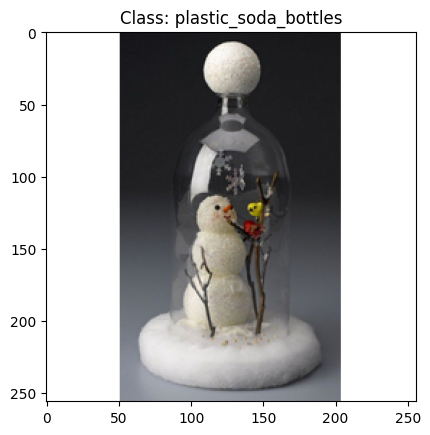

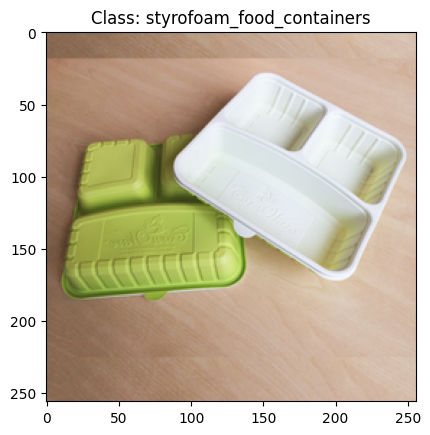

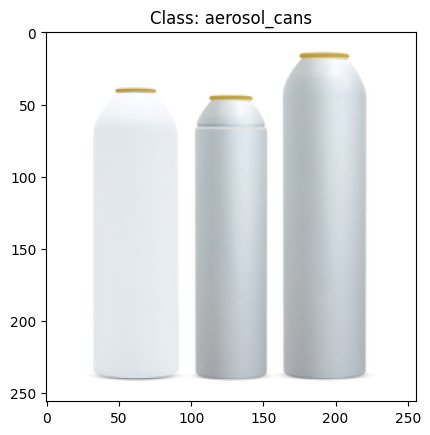

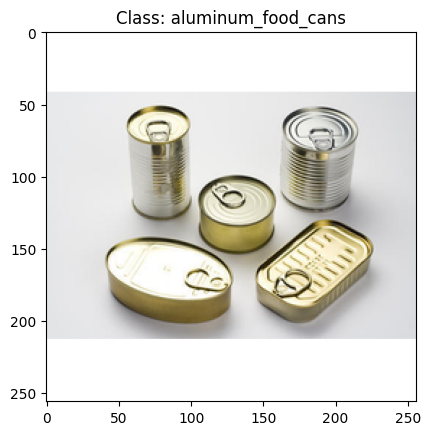

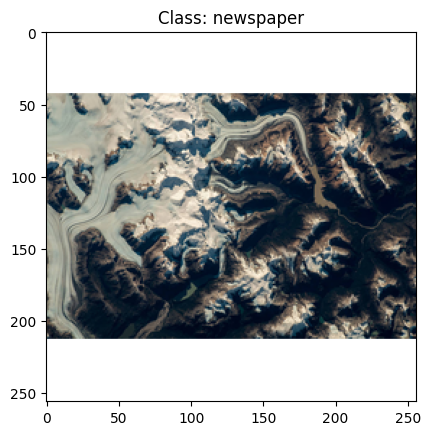

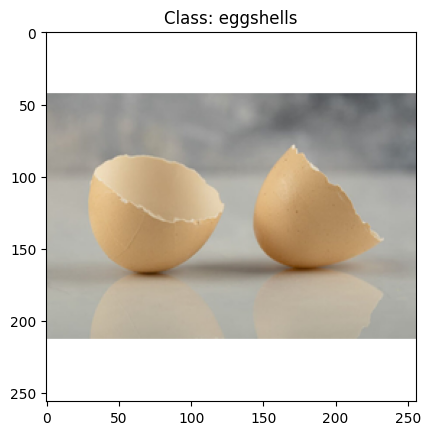

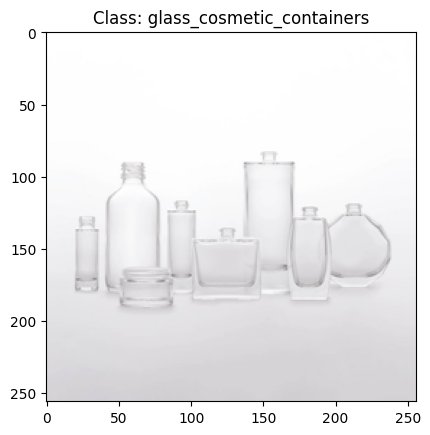

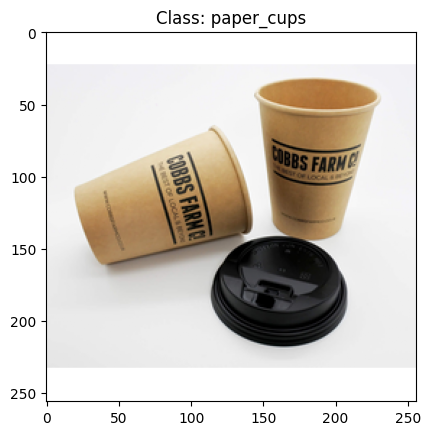

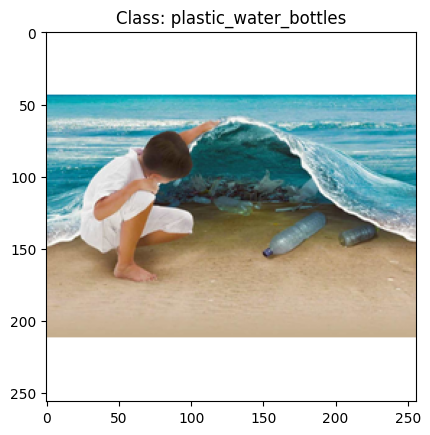

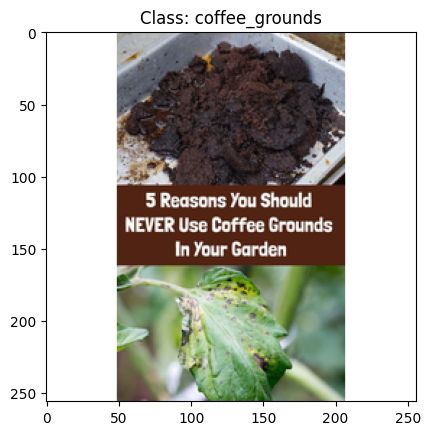

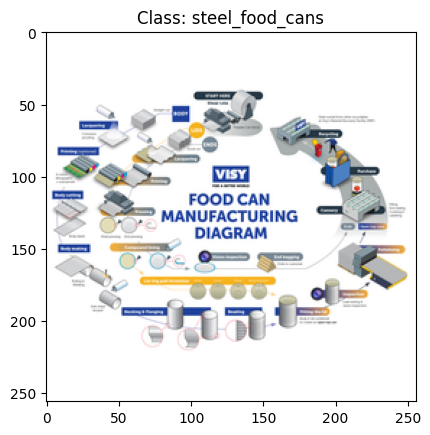

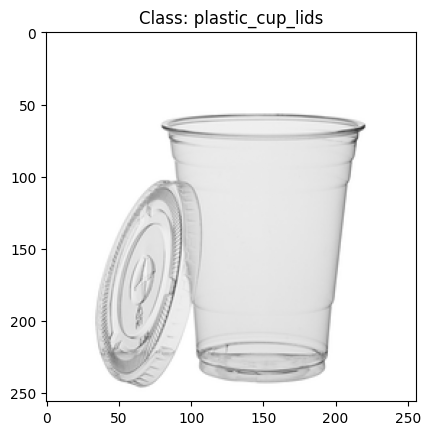

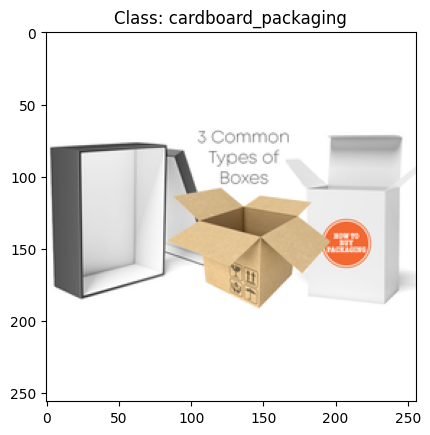

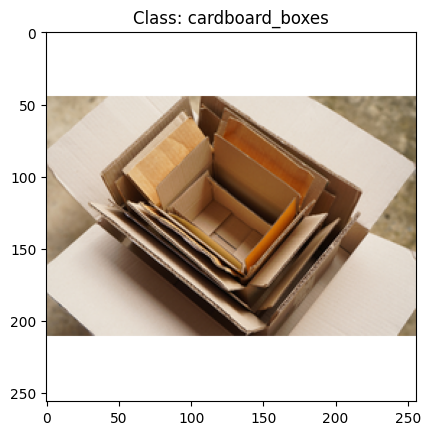

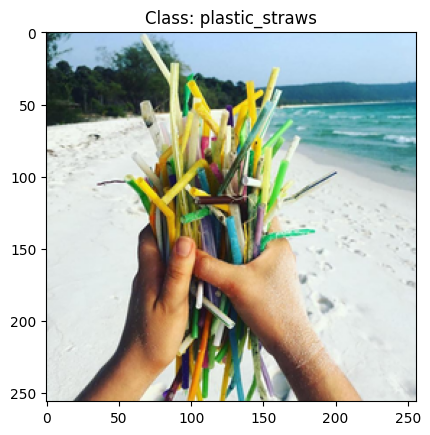

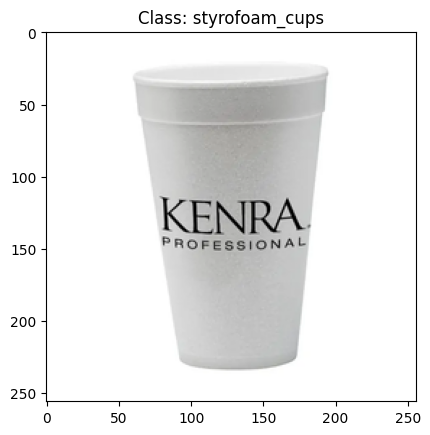

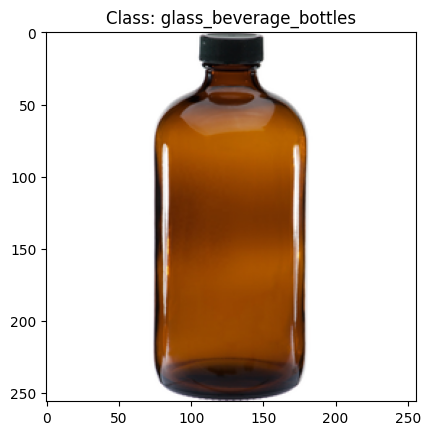

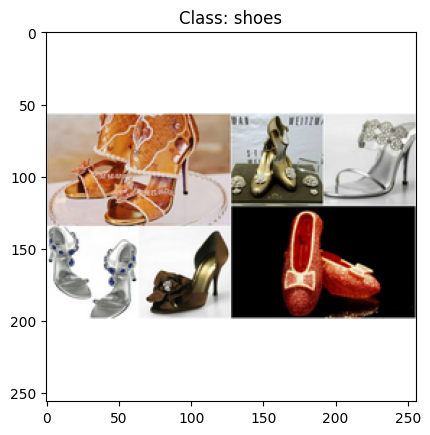

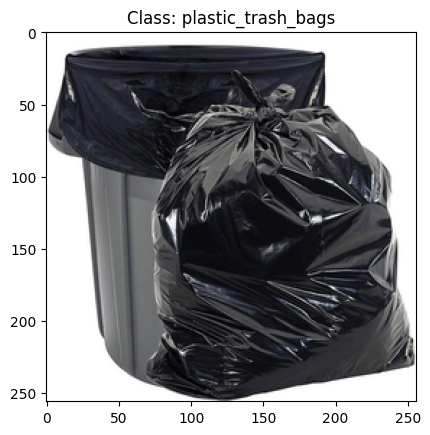

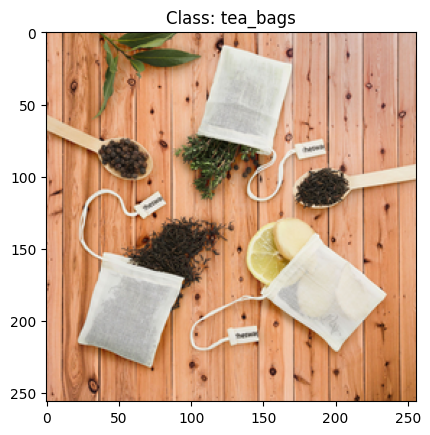

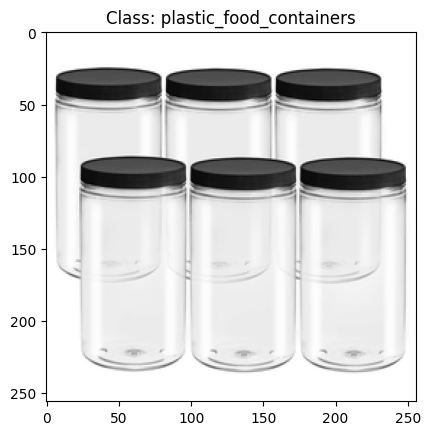

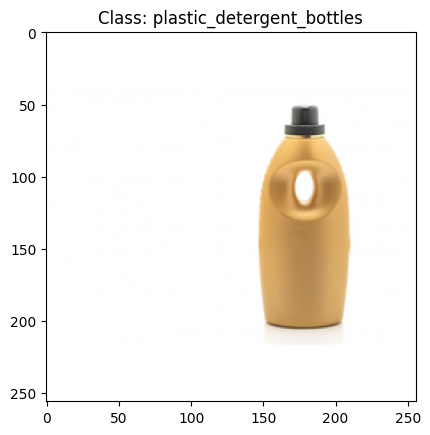

In [8]:
for cls in classes:
    for root, _, files in os.walk(os.path.join(DATA_DIR, cls)):
        if files:
            img_path = os.path.join(root, files[0])
            img = plt.imread(img_path)
            plt.imshow(img)
            plt.title(f"Class: {cls}")
            plt.show()
            break


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224  
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,     
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 12000 images belonging to 30 classes.
Found 3000 images belonging to 30 classes.


In [13]:
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras import layers, models

# Load pre-trained EfficientNetV2 (excluding top layer)
base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze base model for first stage

num_classes = train_generator.num_classes
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 103s 267ms/step - accuracy: 0.0312 - loss: 3.4539 - val_accuracy: 0.0333 - val_loss: 3.4310
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 103s 275ms/step - accuracy: 0.0405 - loss: 3.4209 - val_accuracy: 0.0433 - val_loss: 3.4195
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 105s 280ms/step - accuracy: 0.0461 - loss: 3.4164 - val_accuracy: 0.0527 - val_loss: 3.3984
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 104s 277ms/step - accuracy: 0.0481 - loss: 3.4031 - val_accuracy: 0.0457 - val_loss: 3.4184
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 104s 276ms/step - accuracy: 0.0487 - loss: 3.4008 - val_accuracy: 0.0577 - val_loss: 3.4053


In [15]:
base_model.trainable = True
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 411s 1s/step - accuracy: 0.5002 - loss: 1.7422 - val_accuracy: 0.0333 - val_loss: 3.5355
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 408s 1s/step - accuracy: 0.7707 - loss: 0.7140 - val_accuracy: 0.0603 - val_loss: 4.0278
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 408s 1s/step - accuracy: 0.8197 - loss: 0.5433 - val_accuracy: 0.0343 - val_loss: 4.3575
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 935s 2s/step - accuracy: 0.8493 - loss: 0.4330 - val_accuracy: 0.0203 - val_loss: 3.7701
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 396s 1s/step - accuracy: 0.8692 - loss: 0.3710 - val_accuracy: 0.0343 - val_loss: 4.5570


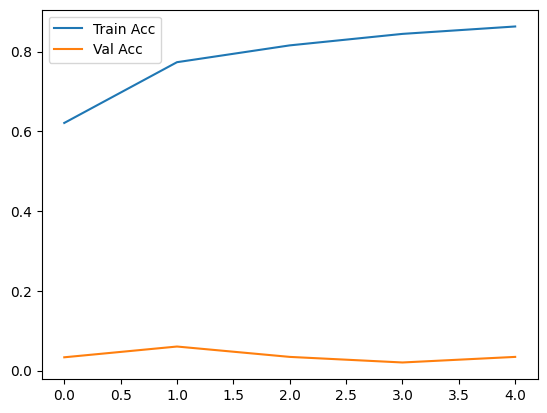

In [16]:
import matplotlib.pyplot as plt

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

plt.plot(acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.legend()
plt.show()

In [17]:
model.save('waste_classifier_efficientnetv2.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('waste_classifier_efficientnetv2.h5')